In [1]:
!pip install --upgrade duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 44.6 MB/s eta 0:00:00


In [2]:
from duckduckgo_search import DDGS

def search_images(search_term, max_images=100):
  print(f"Searching for {search_term}")
  results = DDGS().images(search_term, max_results=max_images)
  url = [result['image'] for result in results if 'image' in result]
  return url

In [3]:
urls = search_images('dog photos', max_images=1)
urls[0]

Searching for dog photos


'https://images.pexels.com/photos/551628/pexels-photo-551628.jpeg?cs=srgb&dl=animal-blur-canine-551628.jpg&fm=jpg'

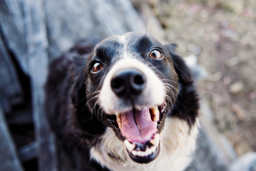

In [4]:
from fastdownload import download_url
from fastai.vision.all import *
dest = 'dog.jpg'
download_url(urls[0], dest, show_progress=False)
im = Image.open(dest)
im.to_thumb(256,256)

Searching for cat photos


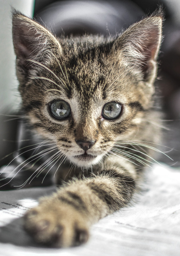

In [5]:
download_url(search_images('cat photos', max_images=1)[0], 'cat.jpg', show_progress=False)
Image.open('cat.jpg').to_thumb(256,256)

In [21]:
from fastai.vision.all import *
from fastcore.all import *
import time

searches = ['cat', 'dog']
path = Path('cat_and_dog')

for o in searches:
    dest = path/o
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(10)
    resize_images(dest, max_size=400, dest=dest)

Searching for cat photo
Searching for dog photo


Training our model

In [22]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

6

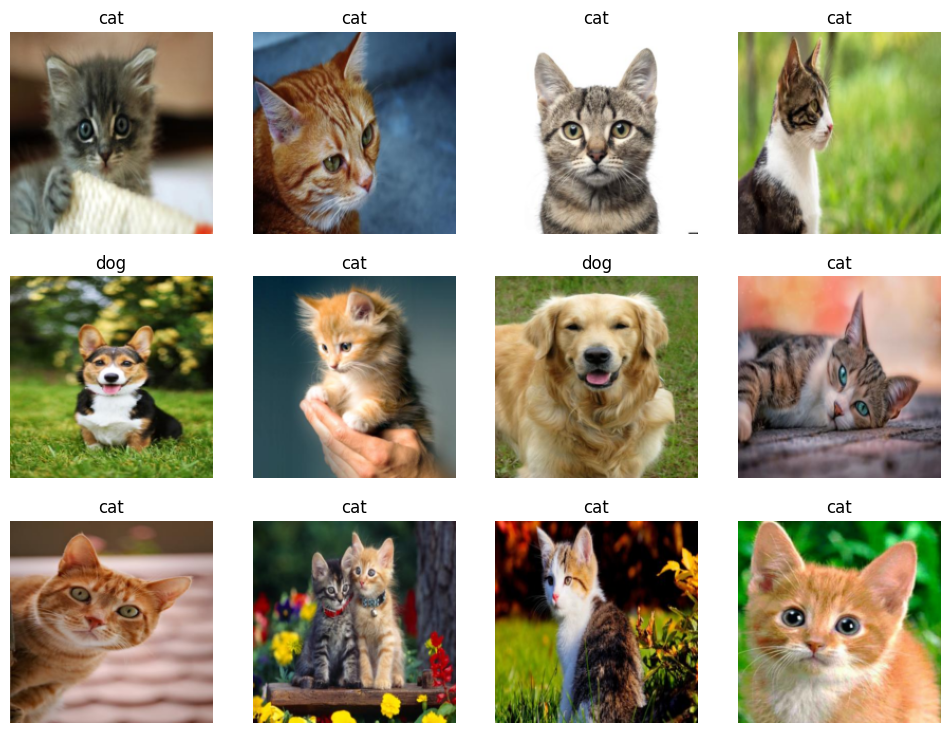

In [23]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

In [24]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.974799,0.763127,0.240000,00:00


epoch,train_loss,valid_loss,error_rate,time
0,0.347088,0.167471,0.080000,00:00
1,0.231063,0.016254,0.000000,00:00
2,0.175309,0.046180,0.040000,00:00
3,0.134254,0.067676,0.040000,00:00
4,0.114325,0.064768,0.040000,00:00


In [25]:
is_cat,_,probs = learn.predict(PILImage.create('cat.jpg'))
print(f"This is a: {is_cat}.")
print(f"Probability it's a cat: {probs[0]:.4f}")

This is a: cat.
Probability it's a cat: 0.9998


In [26]:
is_dog,_,probs = learn.predict(PILImage.create('dog.jpg'))
print(f"This is a: {is_dog}.")
print(f"Probability it's a dog: {probs[1]:.4f}")

This is a: dog.
Probability it's a dog: 0.9999


In [27]:
learn.export('cat_dog_classifier.pkl')

In [30]:
!pip show fastai
!pip show fastdownload
!pip show duckduckgo_search

Name: fastai
Version: 2.7.15
Summary: fastai simplifies training fast and accurate neural nets using modern best practices
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard, Sylvain Gugger, and contributors
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: fastcore, fastdownload, fastprogress, matplotlib, packaging, pandas, pillow, pip, pyyaml, requests, scikit-learn, scipy, spacy, torch, torchvision
Required-by: 
Name: fastdownload
Version: 0.0.7
Summary: A general purpose data downloading library.
Home-page: https://github.com/fastai/fastdownload/tree/master/
Author: Jeremy Howard
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: fastcore, fastprogress
Required-by: fastai
Name: duckduckgo_search
Version: 6.2.0
Summary: Search for words, documents, images, news, maps and text translation using the DuckDuckGo.com search engi